# QoS Prediction Model Development

In [24]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load & inspect data

In [28]:
df = pd.read_csv("data/qws1.txt", delimiter=",", skiprows=42, on_bad_lines="skip")

print(df.head())


       45   83  27.2  50  97.4   89  91      43  58  100  1 DictionaryService  \
0   71.75  100  14.6  88  85.5   78  80   64.42  86   93  1         MyService   
1  117.00  100  23.4  83  88.0  100  87  111.00  59   90  1               aba   
2   70.00  100   5.4  83  79.3  100  75   63.00  91   90  1    AlexaWebSearch   
3  105.20  100  18.2  80  92.2   78  84  104.60  91   90  1       ErrorMailer   
4  224.00  100  24.6  83  80.0  100  87  223.00  88   90  1           getJoke   

  http://www.mindswap.org/2002/services/Dictionary.wsdl  
0          http://mydispatch.com/myservice.asmx?wsdl     
1  http://www.quentinsagerconsulting.com/wsdl/aba...     
2  http://wsearch.amazonaws.com/doc/2007-03-15/We...     
3  http://www.errormail.net/EM/ErrorMailer.asmx?wsdl     
4  http://www.interpressfact.net/webservices/getJ...     


Header creation

In [29]:

df.columns = [
    "ResponseTime", "Availability", "Throughput", "Successability",
    "Reliability", "Compliance", "BestPractices", "Latency", "Documentation",
    "WsRF", "Class", "ServiceName", "WSDLAddress"
]

print(df.head())


   ResponseTime  Availability  Throughput  Successability  Reliability  \
0         71.75           100        14.6              88         85.5   
1        117.00           100        23.4              83         88.0   
2         70.00           100         5.4              83         79.3   
3        105.20           100        18.2              80         92.2   
4        224.00           100        24.6              83         80.0   

   Compliance  BestPractices  Latency  Documentation  WsRF  Class  \
0          78             80    64.42             86    93      1   
1         100             87   111.00             59    90      1   
2         100             75    63.00             91    90      1   
3          78             84   104.60             91    90      1   
4         100             87   223.00             88    90      1   

      ServiceName                                        WSDLAddress  
0       MyService          http://mydispatch.com/myservice.asmx?wsdl 

### Data exploration

In [30]:
print(df.shape)    

(363, 13)


In [31]:
print(df.dtypes)

ResponseTime      float64
Availability        int64
Throughput        float64
Successability      int64
Reliability       float64
Compliance          int64
BestPractices       int64
Latency           float64
Documentation       int64
WsRF                int64
Class               int64
ServiceName        object
WSDLAddress        object
dtype: object


In [32]:
print(df.isnull().sum())

ResponseTime      0
Availability      0
Throughput        0
Successability    0
Reliability       0
Compliance        0
BestPractices     0
Latency           0
Documentation     0
WsRF              0
Class             0
ServiceName       0
WSDLAddress       0
dtype: int64


In [33]:
def is_duplicated(row):
    return row.duplicated().any()

duplicated_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicated_rows)}")

Number of duplicate rows: 0


Distribution 

In [34]:
print(df.describe())

       ResponseTime  Availability  Throughput  Successability  Reliability  \
count    363.000000    363.000000  363.000000      363.000000   363.000000   
mean     842.473893     84.757576    7.230028       64.476584    61.220110   
std     2767.816565     20.479519    6.381522       21.188483    21.144046   
min       50.000000     14.000000    0.100000        7.000000     5.900000   
25%      137.505000     74.500000    2.150000       50.000000    49.800000   
50%      237.000000     96.000000    5.600000       67.000000    64.100000   
75%      481.125000    100.000000   10.600000       80.500000    77.950000   
max    30781.000000    100.000000   29.500000       99.000000    97.700000   

       Compliance  BestPractices       Latency  Documentation        WsRF  \
count  363.000000     363.000000    363.000000     363.000000  363.000000   
mean    83.663912      80.661157    765.464843      47.501377   66.561983   
std      8.779213       6.678348   2759.100577      36.446690   11

Histogram

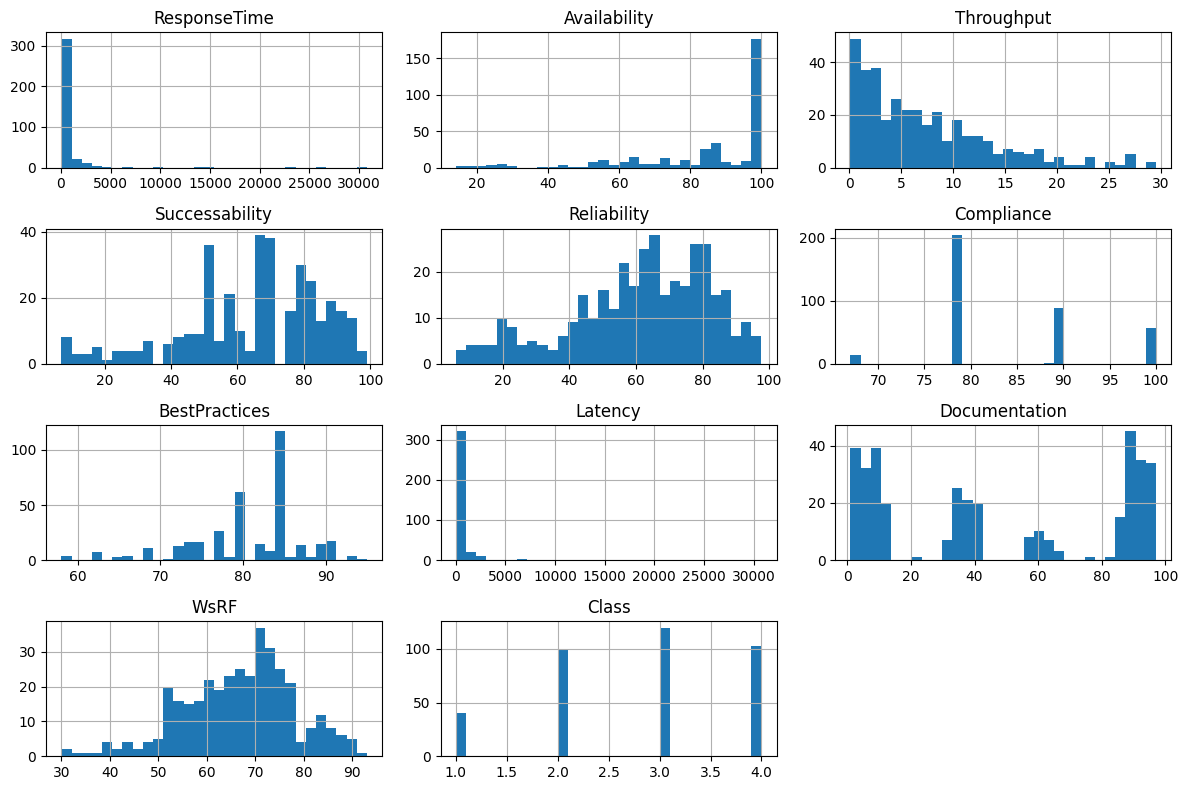

In [35]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

Correlação

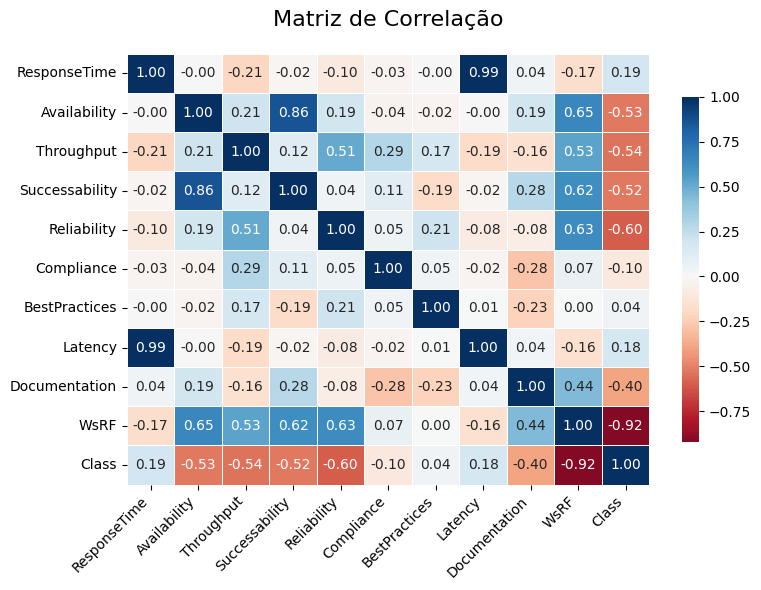

In [43]:
# Calcula a correlação
corr = df.iloc[:, :11].corr()

# Define tamanho da figura
plt.figure(figsize=(8, 6))

# Cria o heatmap com melhorias
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",           
    cmap="RdBu",         
    center=0,           
    linewidths=0.5,     
    cbar_kws={"shrink": 0.8}  
)

# Ajusta título e rótulos
plt.title("Matriz de Correlação", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()
